# Breast Cancer Data Analysis with Log.Reg. and hyperparameter tuning

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
df=pd.read_csv("Breast_Cancer.csv", sep=',')

In [3]:
df.differentiate.unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [4]:
df.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [5]:
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

## Checking data, NaNs and Column names, replace them if needed (Cleaning)

In [6]:
diff=df['differentiate'].str[:-14]
for i in range(0,df.shape[0]):
    if df["Grade"].iloc[i]==' anaplastic; Grade IV':
        df["Grade"].iloc[i]='4'
    if df['differentiate'][i]!="Undifferentiated":
        df['differentiate'][i] = diff[i]
    #if df["differentiate"][i]=='Poorly differentiated':
    #    df["differentiate"][i]='Poorly'
    #elif df["differentiate"][i]=='Moderately differentiated':
      #   df["differentiate"][i]='Moderately'
    #elif df["differentiate"][i]=='Well differentiated':
     #   df["differentiate"][i]='Well'

In [7]:
df["Grade"].unique()

array(['3', '2', '1', '4'], dtype=object)

In [8]:
df['differentiate'].unique()


array(['Poorly ', 'Moderately ', 'Well ', 'Undifferentiated'],
      dtype=object)

In [9]:
df['differentiate']

0           Poorly 
1       Moderately 
2       Moderately 
3           Poorly 
4           Poorly 
           ...     
4019    Moderately 
4020    Moderately 
4021    Moderately 
4022    Moderately 
4023    Moderately 
Name: differentiate, Length: 4024, dtype: object

In [10]:
df.rename(columns = {'T Stage ': 'T Stage','Reginol Node Positive': 'Regional Node Positive'}, inplace=True)
#df.rename(columns={'Reginol Node Positive': 'Regional Node Positive'}, inplace=True)
df['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [11]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

## Data Description (Analytics)

In [12]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Regional Node Positive     int64
Survival Months            int64
Status                    object
dtype: object

In [13]:
df.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Regional Node Positive  Survival Months  
count             4024.000000      4024.000000  
mean                 4.158052        71.297962  
std                  5.109331        22.921430  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 46.000000       107.000000

In [14]:
filtered_dead = df.loc[df['Status'] == 'Dead']
filtered_dead

Age   Race Marital Status T Stage N Stage 6th Stage differentiate Grade  \
7      40  White        Married      T2      N1       IIB   Moderately      2   
10     68  White        Widowed      T1      N1       IIA   Moderately      2   
40     57  White        Single       T3      N3      IIIC   Moderately      2   
46     42  White        Married      T1      N3      IIIC   Moderately      2   
64     67  White       Divorced      T1      N1       IIA   Moderately      2   
...   ...    ...            ...     ...     ...       ...           ...   ...   
3996   69  White        Married      T1      N2      IIIA   Moderately      2   
4003   66  White       Divorced      T1      N2      IIIA   Moderately      2   
4004   58  White        Married      T2      N2      IIIA   Moderately      2   
4010   59  Black        Single       T2      N1       IIB       Poorly      3   
4017   46  White        Married      T2      N1       IIB   Moderately      2   

       A Stage  Tumor Size Estrogen Status Progesterone Status  \
7     Regional          30        Positive            Positive   
10    Regional          13        Positive            Positive   
40    Regional          70        Positive            Positive   
46    Regional           9        Negative            Negative   
64    Regional          13        Positive            Positive   
...        ...         ...             ...                 ...   
3996  Regional          19        Positive            Positive   
4003  Regional          19        Positive            Positive   
4004  Regional          24        Positive            Negative   
4010  Regional          23        Positive            Negative   
4017  Regional          28        Negative            Negative   

      Regional Node Examined  Regional Node Positive  Survival Months Status  
7                          9                       1               14   Dead  
10                         9                       1               64   Dead  
40                        12                      12               42   Dead  
46                        15                       2               39   Dead  
64                        16                       3               60   Dead  
...                      ...                     ...              ...    ...  
3996                      21                       9               88   Dead  
4003                      21                       7               64   Dead  
4004                      19                       9               65   Dead  
4010                       6                       1               27   Dead  
4017                       2                       1               19   Dead  

[616 rows x 16 columns]

In [15]:
mp = {"Alive":0, "Dead":1}
df["Status"] = df["Status"].map(mp)

In [16]:
df["Status"].unique()

array([0, 1], dtype=int64)

In [17]:
filtered_dead.describe() # in order to look at survival months of dead patients

Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
count  616.000000  616.000000              616.000000              616.000000   
mean    55.150974   37.139610               15.019481                7.241883   
std      9.698291   24.116115                8.486600                7.312642   
min     30.000000    1.000000                1.000000                1.000000   
25%     48.000000   20.000000                9.000000                2.000000   
50%     56.500000   30.000000               14.000000                4.000000   
75%     63.000000   50.000000               20.000000               10.000000   
max     69.000000  140.000000               57.000000               46.000000   

       Survival Months  
count       616.000000  
mean         45.610390  
std          23.966253  
min           2.000000  
25%          27.000000  
50%          44.000000  
75%          61.000000  
max         102.000000

## Let's look how the survival months is changing among dead people

<BarContainer object of 100 artists>

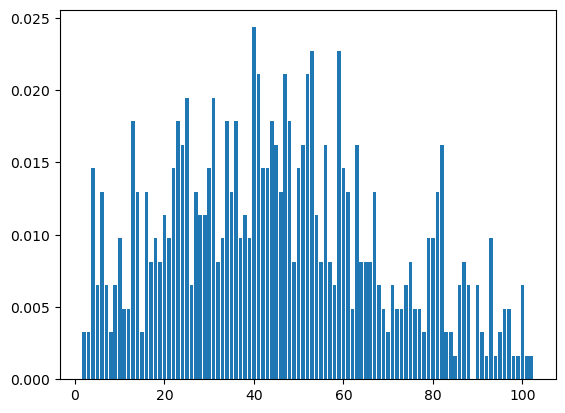

In [18]:
count_month=filtered_dead["Survival Months"].value_counts(sort=False)
y=count_month/count_month.sum()
x=y.index
plt.bar(x,y)

<Axes: xlabel='Survival Months', ylabel='Density'>

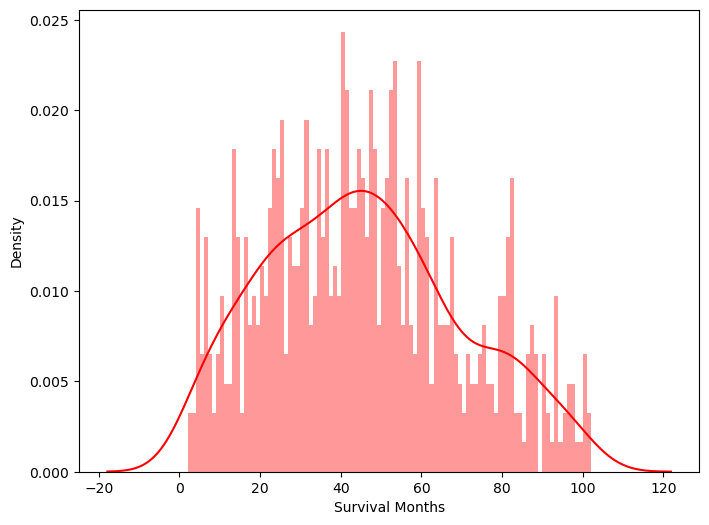

In [19]:
#df.drop(['Status'],axis=1).hist(bins=80,color='blue',figsize=(25,50),layout=(8,3))

plt.figure(figsize=(8,6))
#plt.xlim(-20,125)
#plt.ylim(-0.0005,0.025)
sn.distplot(filtered_dead['Survival Months'],bins=100,color='red')
#filtered_dead["Survival Months"].hist(bins=20,color='blue',figsize=(8,6))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tumor Size'}>,
        <Axes: title={'center': 'Regional Node Examined'}>],
       [<Axes: title={'center': 'Regional Node Positive'}>,
        <Axes: title={'center': 'Survival Months'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

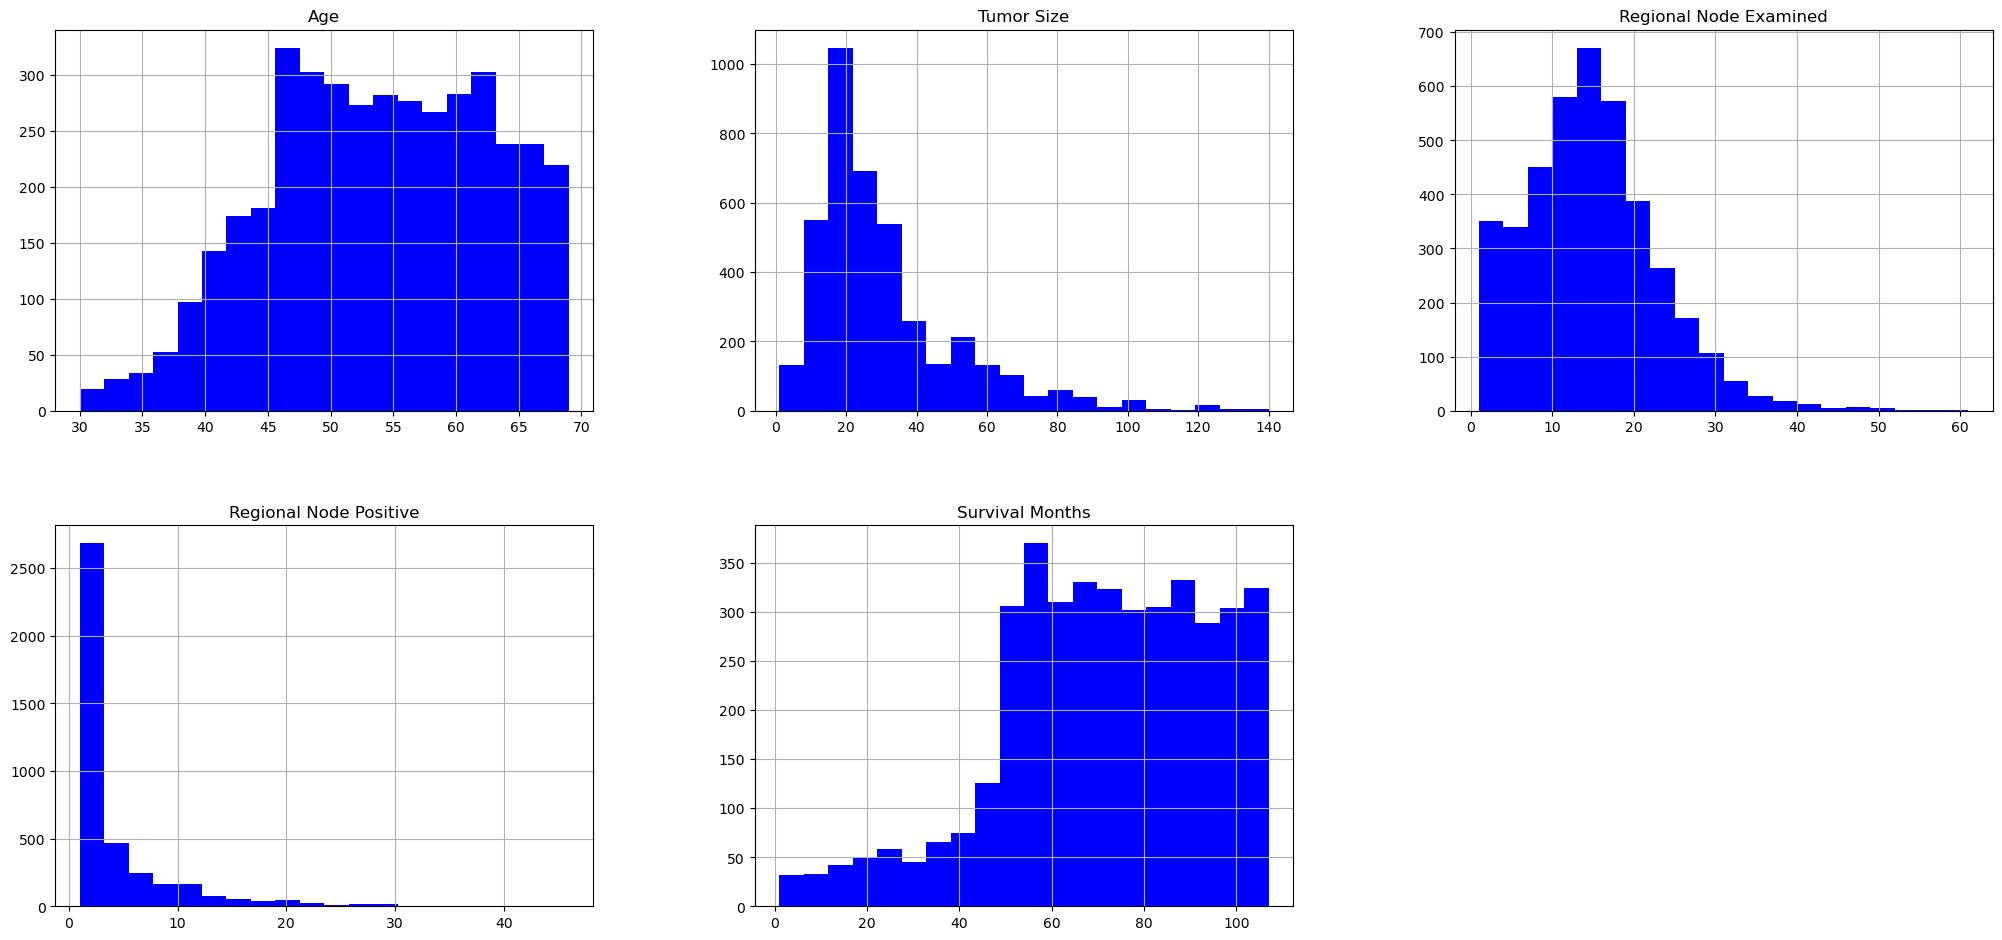

In [20]:
df.drop(['Status'],axis=1).hist(bins=20,color='blue',figsize=(25,50),layout=(8,3))

## 1) I want to sketch here a curve fitting and 2)implement central limit theorem

In [21]:
round(filtered_dead["Survival Months"].mean(),2)

45.61

In [22]:
DeadxTot=df.loc[df["Status"]=="Dead"].shape[0]/df.shape[0]
filtered_est=df.loc[df['Estrogen Status'] == 'Positive']
filtered_est_pro=df.loc[(df['Estrogen Status'] == 'Positive') & (df['Progesterone Status'] == 'Positive')]
filtered_est_DeadxTot = filtered_est.loc[filtered_est["Status"]=="Dead"].shape[0]/filtered_est.shape[0] 
filtered_est_pro_DeadxTot = filtered_est_pro.loc[filtered_est_pro["Status"]=="Dead"].shape[0]/filtered_est_pro.shape[0]
print("Df Data comparison: "+str(round(DeadxTot,4))+ " vs" + " Filtered Data Comparison: " +str(round(filtered_est_DeadxTot,4)))
print("Df Data comparison: "+str(round(DeadxTot,4))+ " vs" + " Filtered Data Comparison: " +str(round(filtered_est_pro_DeadxTot,4)))

Df Data comparison: 0.0 vs Filtered Data Comparison: 0.0
Df Data comparison: 0.0 vs Filtered Data Comparison: 0.0


In [23]:
print(filtered_est.shape)
print(df.loc[df['Progesterone Status'] == 'Positive'].shape)
filtered_pro=df.loc[df['Progesterone Status'] == 'Positive']
filtered_pro_DeadxTot = filtered_pro.loc[filtered_pro["Status"]=="Dead"].shape[0]/filtered_pro.shape[0]
round(filtered_pro_DeadxTot,4)

(3755, 16)
(3326, 16)


0.0

## It is seen that both hormons may affects positively to be staying alive

In [24]:
filtered_est_pro.shape[0]

3299

In [25]:
df

Age   Race Marital Status T Stage N Stage 6th Stage differentiate Grade  \
0      68  White        Married      T1      N1       IIA       Poorly      3   
1      50  White        Married      T2      N2      IIIA   Moderately      2   
2      58  White       Divorced      T3      N3      IIIC   Moderately      2   
3      58  White        Married      T1      N1       IIA       Poorly      3   
4      47  White        Married      T2      N1       IIB       Poorly      3   
...   ...    ...            ...     ...     ...       ...           ...   ...   
4019   62  Other        Married      T1      N1       IIA   Moderately      2   
4020   56  White       Divorced      T2      N2      IIIA   Moderately      2   
4021   68  White        Married      T2      N1       IIB   Moderately      2   
4022   58  Black       Divorced      T2      N1       IIB   Moderately      2   
4023   46  White        Married      T2      N1       IIB   Moderately      2   

       A Stage  Tumor Size Estrogen Status Progesterone Status  \
0     Regional           4        Positive            Positive   
1     Regional          35        Positive            Positive   
2     Regional          63        Positive            Positive   
3     Regional          18        Positive            Positive   
4     Regional          41        Positive            Positive   
...        ...         ...             ...                 ...   
4019  Regional           9        Positive            Positive   
4020  Regional          46        Positive            Positive   
4021  Regional          22        Positive            Negative   
4022  Regional          44        Positive            Positive   
4023  Regional          30        Positive            Positive   

      Regional Node Examined  Regional Node Positive  Survival Months  Status  
0                         24                       1               60       0  
1                         14                       5               62       0  
2                         14                       7               75       0  
3                          2                       1               84       0  
4                          3                       1               50       0  
...                      ...                     ...              ...     ...  
4019                       1                       1               49       0  
4020                      14                       8               69       0  
4021                      11                       3               69       0  
4022                      11                       1               72       0  
4023                       7                       2              100       0  

[4024 rows x 16 columns]

In [26]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
#le = LabelEncoder()

for i in range(0,len(df.dtypes)):
    le = LabelEncoder()
    #df.select_dtypes(include=['object'])
    # if isinstance(df["i"], "object"):
    if df.dtypes[i]=='O':
        # Fit the encoder to the data
        le.fit(df[df.columns[i]]) # iloc ile de elemek olardı
        #print("ok")
        #Transform the data
        df[df.columns[i]] = le.transform(df[df.columns[i]])

        

In [27]:
#df.style.set_properties(**{'text-align': 'center'})
df.style.set_properties(**{'text-align': 'center'})

## MinMax Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

for i in range(0,len(df.dtypes)):
    
    mms = MinMaxScaler()
    df[df.columns[i]]=MinMaxScaler().fit_transform(df[df.columns[i]].values.reshape(-1,1))
    #df=df.drop(["Amount","Time"], axis=1)

In [29]:
df

Age  Race  Marital Status   T Stage  N Stage  6th Stage  \
0     0.974359   1.0            0.25  0.000000      0.0       0.00   
1     0.512821   1.0            0.25  0.333333      0.5       0.50   
2     0.717949   1.0            0.00  0.666667      1.0       1.00   
3     0.717949   1.0            0.25  0.000000      0.0       0.00   
4     0.435897   1.0            0.25  0.333333      0.0       0.25   
...        ...   ...             ...       ...      ...        ...   
4019  0.820513   0.5            0.25  0.000000      0.0       0.00   
4020  0.666667   1.0            0.00  0.333333      0.5       0.50   
4021  0.974359   1.0            0.25  0.333333      0.0       0.25   
4022  0.717949   0.0            0.00  0.333333      0.0       0.25   
4023  0.410256   1.0            0.25  0.333333      0.0       0.25   

      differentiate     Grade  A Stage  Tumor Size  Estrogen Status  \
0          0.333333  0.666667      1.0    0.021583              1.0   
1          0.000000  0.333333      1.0    0.244604              1.0   
2          0.000000  0.333333      1.0    0.446043              1.0   
3          0.333333  0.666667      1.0    0.122302              1.0   
4          0.333333  0.666667      1.0    0.287770              1.0   
...             ...       ...      ...         ...              ...   
4019       0.000000  0.333333      1.0    0.057554              1.0   
4020       0.000000  0.333333      1.0    0.323741              1.0   
4021       0.000000  0.333333      1.0    0.151079              1.0   
4022       0.000000  0.333333      1.0    0.309353              1.0   
4023       0.000000  0.333333      1.0    0.208633              1.0   

      Progesterone Status  Regional Node Examined  Regional Node Positive  \
0                     1.0                0.383333                0.000000   
1                     1.0                0.216667                0.088889   
2                     1.0                0.216667                0.133333   
3                     1.0                0.016667                0.000000   
4                     1.0                0.033333                0.000000   
...                   ...                     ...                     ...   
4019                  1.0                0.000000                0.000000   
4020                  1.0                0.216667                0.155556   
4021                  0.0                0.166667                0.044444   
4022                  1.0                0.166667                0.000000   
4023                  1.0                0.100000                0.022222   

      Survival Months  Status  
0            0.556604     0.0  
1            0.575472     0.0  
2            0.698113     0.0  
3            0.783019     0.0  
4            0.462264     0.0  
...               ...     ...  
4019         0.452830     0.0  
4020         0.641509     0.0  
4021         0.641509     0.0  
4022         0.669811     0.0  
4023         0.933962     0.0  

[4024 rows x 16 columns]

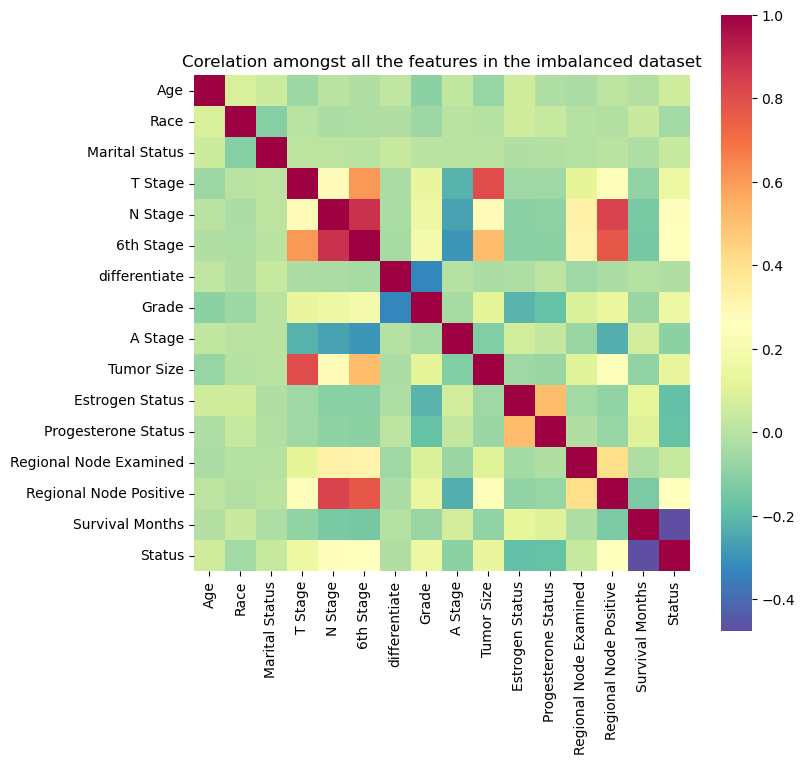

In [30]:
#Get Corelation Matrix between all the features present in the data
cor_matr = df.corr()
plt.figure(figsize=(8,8))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

In [31]:
df.Status.value_counts(sort=False)

0.0    3408
1.0     616
Name: Status, dtype: int64

## There is an imbalance problem. Lets do undersampling and oversampling to obtain more precise results at the end in order to make decision

In [32]:
state=48
#Sample etmek


dead=df[df['Status']==1]
alive=df[df['Status']==0].sample(dead.shape[0],random_state=state)
data_under=pd.concat([dead,alive])

#Datani qarishdirmaq
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under.head()

Age  Race  Marital Status   T Stage  N Stage  6th Stage  \
0  0.769231   1.0            0.00  0.333333      0.5       0.50   
1  0.487179   1.0            0.75  0.000000      0.5       0.50   
2  1.000000   1.0            1.00  0.333333      1.0       1.00   
3  0.794872   1.0            0.25  0.000000      1.0       1.00   
4  0.512821   1.0            0.75  0.333333      0.0       0.25   

   differentiate     Grade  A Stage  Tumor Size  Estrogen Status  \
0       0.333333  0.666667      1.0    0.244604              1.0   
1       1.000000  0.000000      1.0    0.115108              1.0   
2       0.000000  0.333333      1.0    0.165468              1.0   
3       0.000000  0.333333      1.0    0.136691              1.0   
4       0.333333  0.666667      1.0    0.338129              0.0   

   Progesterone Status  Regional Node Examined  Regional Node Positive  \
0                  1.0                0.150000                0.088889   
1                  1.0                0.116667                0.088889   
2                  1.0                0.233333                0.266667   
3                  1.0                0.466667                0.622222   
4                  0.0                0.200000                0.000000   

   Survival Months  Status  
0         0.509434     0.0  
1         0.481132     1.0  
2         0.235849     1.0  
3         0.226415     1.0  
4         0.377358     1.0

In [33]:
data_under.shape

(1232, 16)

In [34]:
df.shape

(4024, 16)

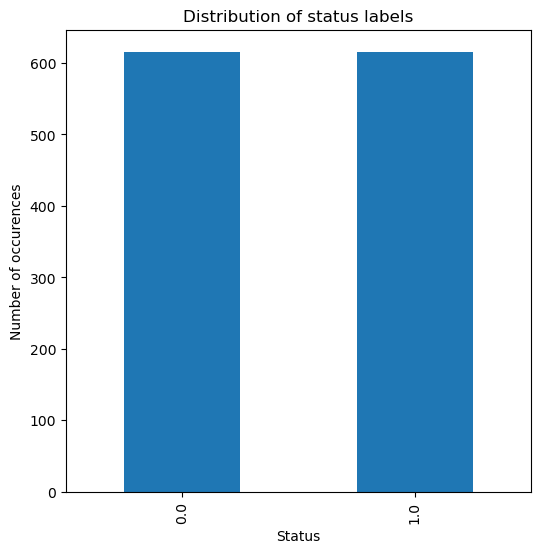

In [35]:
#Check the class distribution in the given data
data_under['Status'].value_counts().plot(figsize=(6,6),kind='bar')
plt.title("Distribution of status labels")
plt.xlabel("Status")
plt.ylabel("Number of occurences")
plt.show()

In [36]:
data_under['Status'].value_counts()

0.0    616
1.0    616
Name: Status, dtype: int64

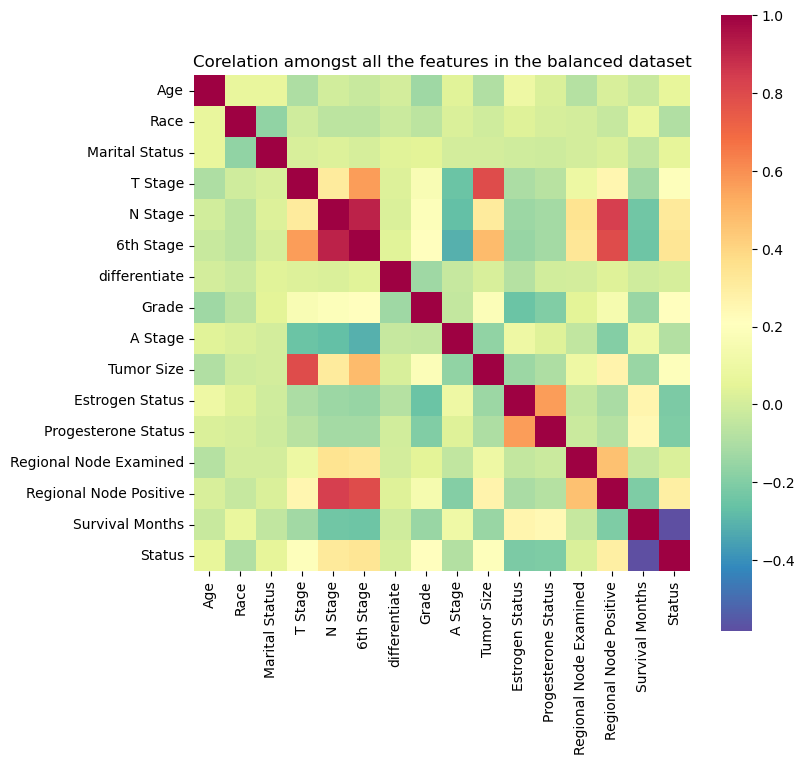

In [37]:
#Get Corelation Matrix between all the features present in the under sampled data
cor_matr = data_under.corr()
plt.figure(figsize=(8,8))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the balanced dataset')
plt.show()

In [38]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
print(X_train)

[[0.33333333 1.         0.75       ... 0.31666667 0.15555556 0.68867925]
 [0.58974359 1.         0.25       ... 0.11666667 0.         1.        ]
 [0.43589744 1.         0.25       ... 0.5        0.28888889 1.        ]
 ...
 [0.38461538 1.         0.75       ... 0.11666667 0.         0.45283019]
 [0.28205128 1.         0.75       ... 0.58333333 0.06666667 0.26415094]
 [0.46153846 1.         0.25       ... 0.23333333 0.         0.45283019]]


In [41]:
print(y_train)

[0. 0. 0. ... 0. 1. 1.]


In [42]:
print(X_test)

[[0.71794872 1.         0.25       ... 0.26666667 0.08888889 0.69811321]
 [0.74358974 1.         0.25       ... 0.18333333 0.02222222 0.18867925]
 [0.48717949 1.         0.25       ... 0.15       0.15555556 0.71698113]
 ...
 [0.82051282 1.         0.75       ... 0.2        0.06666667 0.40566038]
 [0.28205128 1.         0.25       ... 0.66666667 0.31111111 0.47169811]
 [0.41025641 1.         0.         ... 0.13333333 0.08888889 0.67924528]]


In [43]:
print(y_test)

[0. 0. 0. ... 1. 1. 1.]


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from datetime import datetime as dt
state = 48
st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=state)
random_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
random_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:05.708090


In [45]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Umumi accuracy-nin hesablanmasi
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print(accuracy)
#Umumi recall-in hesablanmasi
recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
print(recall)
#roc-auc-nin hesablanmasi
#Model kalibrat olunmasi
clf_cal = CalibratedClassifierCV(model, method="sigmoid")
clf_cal.fit(X_train, y_train)
class_probabilities = clf_cal.predict_proba(X_test)
y_probs = class_probabilities[:,1]
roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
print(roc_auc)
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)
#F1 sc#ore-un hesablanmasi
f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.885685884691849
0.36774193548387096
0.8581479094803078
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       851
         1.0       0.77      0.37      0.50       155

    accuracy                           0.89      1006
   macro avg       0.83      0.67      0.72      1006
weighted avg       0.88      0.89      0.87      1006

0.885685884691849
